In [1]:
% load_ext autoreload
% autoreload 2
% cd '/home/xingyu/Projects/PlasticineLab'
% pwd
% matplotlib inline
import matplotlib.pyplot as plt
import taichi as ti
import numpy as np
import cv2
import os
from plb.utils.visualization_utils import save_rgb

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
target_path = './datasets/0915_GatherMove/init'
if not os.path.exists(target_path):
    os.makedirs(target_path, exist_ok=True)

np.random.seed(0)
from plb.envs.multitask_env import MultitaskPlasticineEnv

env = MultitaskPlasticineEnv(cfg_path=f'gather_move.yml', generating_cached_state=True)
taichi_env = env.taichi_env

/home/xingyu/Projects/PlasticineLab
[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-nhwxp1uc
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.8.5
[Taichi] Starting on arch=cuda
[Tina] version 0.1.1
[Tina] Taichi properties hacked
pimirives: num primitive: 3
Building primitive
action:
  dim: 7
  scale: (0.015, 0.0, 0.015, 0.0, 0.0, 0.1, 0.03)
collision_group: [0.0, 0.0, 0.0]
color: (0.7568, 0.6039, 0.4196)
friction: 1.0
init_gap: 0.3
init_pos: (0.7, 0.06, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
minimal_gap: 0.05
round: 0
shape: Gripper
size: (0.015, 0.09, 0.05)
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 6
  scale: (0.015, 0.01, 0.015, 0.0, 0.0, 0.05)
collision_group: [0.0, 0.0, 0.0]
color: (0.7568, 0.6039, 0.4196)
friction: 50.0
init_pos: (0.7, 0.01, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
shape: Box
size: (0.07, 0.07, 0.02)
upper_bound: (1.0, 1.0, 1.0)
va

Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target,

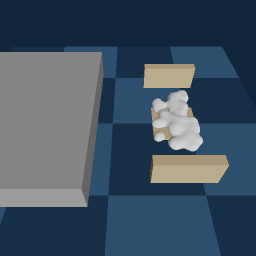

In [58]:
set_render_mode('mesh')
import lzma
import pickle
import numpy as np
import os
from plb.utils.visualization_utils import save_numpy_as_gif

N = 100
xs = np.linspace(0.32, 0.42, N)


def randomize_tool_state(cfg, box_min_x, pin_min_y):
    pos = eval(cfg.PRIMITIVES[0]['init_pos'])
    height = np.random.rand() * 0.1
    x_shift = np.random.rand() * 0.1 - 0.1
    cfg.PRIMITIVES[0]['init_pos'] = (pos[0] + x_shift, float(pin_min_y + height), pos[2])


def case1(cfg):  # Scattered
    cfg.SHAPES[0]['seed'] = i


target_id = 0
target_imgs = []


def save_state():
    global target_id
    img = taichi_env.render(mode='rgb', img_size=256)
    state = taichi_env.get_state()
    state_name = os.path.join(target_path, f'state_{target_id}.xz')
    with lzma.open(state_name, 'wb') as f:
        pickle.dump(state, f, protocol=4)
    save_rgb(os.path.join(target_path, f'state_{target_id}.png'), np.array(img[:, :, :3]).astype(np.float32))
    target_id += 1
    target_imgs.append(img)


gifpath = os.path.join(target_path, 'vis_all.gif')
for case_id, case in enumerate([case1]):
    for i in range(N):
        env.reset(target_cfg_modifier=case)
        for _ in range(10):
            env.step(np.array([0] * 13))  # Wait for dough to drop
        save_state()
        for j in range(25):
            action = np.array([0] * 7 + [0.] * 6)
            action[6] = ((j < 15) - 0.5) * 2
            env.step(action)
        save_state()
        taichi_env.primitives[0].set_state(0, [0.7, 0.06, 0.5, 0.707, 0.707, 0., 0., 0.4])
        for j in range(25):
            action = np.array([0] * 7 + [0.] * 6)
            action[6] = ((j < 15) - 0.5) * 2
            env.step(action)
        save_state()
target_imgs = np.array(target_imgs)
target_imgs = np.concatenate([target_imgs[::3, :, :, :3],
                              target_imgs[1::3, :, :, :3],
                              target_imgs[2::3, :, :, :3]])
save_numpy_as_gif(target_imgs, gifpath)
from IPython.display import Image

Image(gifpath)

{'pos_min': (0.62, 0.02, 0.38), 'pos_max': (0.78, 0.035, 0.62), 'color': (0.7568, 0.6039, 0.4196), 'seed': 0}
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================


  1%|          | 1/180 [00:00<00:19,  9.00it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.37]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.34]


  1%|          | 2/180 [00:00<00:19,  9.27it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.31]


  2%|▏         | 4/180 [00:00<00:17, 10.03it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.28]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.25]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.22]


  4%|▍         | 8/180 [00:00<00:15, 11.15it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.19]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.16]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.13]


  6%|▌         | 10/180 [00:00<00:14, 11.43it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.1 ]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.13]


  7%|▋         | 12/180 [00:01<00:14, 11.62it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.16]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.19]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.22]


  8%|▊         | 14/180 [00:01<00:14, 11.75it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.25]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.28]


 10%|█         | 18/180 [00:01<00:13, 11.73it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.31]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.34]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.37]


 11%|█         | 20/180 [00:01<00:13, 11.75it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.4 ]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.43]


 12%|█▏        | 22/180 [00:01<00:13, 11.77it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.46]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.49]
[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.52]


 13%|█▎        | 24/180 [00:02<00:13, 11.77it/s]

[ 0.7   0.06  0.5   0.5   0.5  -0.5   0.5   0.55]
[ 0.7         0.06        0.5         0.48734506  0.48734506 -0.51234246
  0.51234246  0.55      ]


 16%|█▌        | 28/180 [00:02<00:13, 11.63it/s]

[ 0.7         0.06        0.5         0.47438555  0.47438555 -0.52436471
  0.52436471  0.55      ]
[ 0.7         0.06        0.5         0.46112956  0.46112956 -0.53605926
  0.53605926  0.55      ]
[ 0.7         0.06        0.5         0.44758537  0.44758537 -0.54741879
  0.54741879  0.55      ]


 17%|█▋        | 30/180 [00:02<00:12, 11.56it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.55      ]
[ 0.7         0.06        0.5         0.41966647  0.41966647 -0.56910461
  0.56910461  0.55      ]


 18%|█▊        | 32/180 [00:02<00:13, 11.33it/s]

[ 0.7         0.06        0.5         0.4053092   0.4053092  -0.57941734
  0.57941734  0.55      ]
[ 0.7         0.06        0.5         0.39069862  0.39069862 -0.58936795
  0.58936795  0.55      ]


 19%|█▉        | 34/180 [00:02<00:12, 11.38it/s]

[ 0.7         0.06        0.5         0.37584387  0.37584387 -0.59895023
  0.59895023  0.55      ]
[ 0.7         0.06        0.5         0.36075423  0.36075423 -0.60815819
  0.60815819  0.55      ]
[ 0.7         0.06        0.5         0.34543913  0.34543913 -0.61698607
  0.61698607  0.55      ]


 20%|██        | 36/180 [00:03<00:12, 11.38it/s]

[ 0.7         0.06        0.5         0.32990814  0.32990814 -0.62542835
  0.62542835  0.55      ]
[ 0.7         0.06        0.5         0.31417097  0.31417097 -0.63347976
  0.63347976  0.55      ]


 22%|██▏       | 40/180 [00:03<00:12, 11.39it/s]

[ 0.7         0.06        0.5         0.29823745  0.29823745 -0.64113526
  0.64113526  0.55      ]
[ 0.7         0.06        0.5         0.28211755  0.28211755 -0.64839008
  0.64839008  0.55      ]
[ 0.7         0.06        0.5         0.26582133  0.26582133 -0.65523967
  0.65523967  0.55      ]


 23%|██▎       | 42/180 [00:03<00:12, 11.49it/s]

[ 0.7         0.06        0.5         0.24935898  0.24935898 -0.66167976
  0.66167976  0.55      ]
[ 0.7         0.06        0.5         0.23274078  0.23274078 -0.66770632
  0.66770632  0.55      ]


 24%|██▍       | 44/180 [00:03<00:11, 11.57it/s]

[ 0.7         0.06        0.5         0.21597714  0.21597714 -0.67331558
  0.67331558  0.55      ]
[ 0.7         0.06        0.5         0.19907851  0.19907851 -0.67850405
  0.67850405  0.55      ]


 26%|██▌       | 46/180 [00:04<00:11, 11.64it/s]

[ 0.7         0.06        0.5         0.18205547  0.18205547 -0.68326847
  0.68326847  0.55      ]
[ 0.7         0.06        0.5         0.16491865  0.16491865 -0.68760588
  0.68760588  0.55      ]
[ 0.7         0.06        0.5         0.14767876  0.14767876 -0.69151355
  0.69151355  0.55      ]


 28%|██▊       | 50/180 [00:04<00:11, 11.48it/s]

[ 0.7         0.06        0.5         0.13034657  0.13034657 -0.69498904
  0.69498904  0.55      ]
[ 0.7         0.06        0.5         0.11293292  0.11293292 -0.6980302
  0.6980302   0.55      ]


 29%|██▉       | 52/180 [00:04<00:11, 11.57it/s]

[ 0.7        0.06       0.5        0.0954487  0.0954487 -0.7006351
  0.7006351  0.55     ]
[ 0.7         0.06        0.5         0.07790482  0.07790482 -0.70280213
  0.70280213  0.55      ]
[ 0.7         0.06        0.5         0.06031225  0.06031225 -0.70452994
  0.70452994  0.55      ]


 30%|███       | 54/180 [00:04<00:10, 11.73it/s]

[ 0.7         0.06        0.5         0.04268199  0.04268199 -0.70581743
  0.70581743  0.55      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.55      ]


 31%|███       | 56/180 [00:04<00:10, 11.89it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.52      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.49      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.46      ]


 33%|███▎      | 60/180 [00:05<00:10, 11.90it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.43      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.4       ]


 34%|███▍      | 62/180 [00:05<00:09, 11.88it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.37      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.34      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.31      ]


 36%|███▌      | 64/180 [00:05<00:09, 11.82it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.28      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.25      ]


 37%|███▋      | 66/180 [00:05<00:09, 11.77it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.22      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.19      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.16      ]


 39%|███▉      | 70/180 [00:06<00:09, 11.80it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.13      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.1       ]


 40%|████      | 72/180 [00:06<00:09, 11.82it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.07      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.05      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.05      ]


 41%|████      | 74/180 [00:06<00:08, 11.87it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.05      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.05      ]


 42%|████▏     | 76/180 [00:06<00:08, 11.93it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.08      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.11      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.14      ]


 44%|████▍     | 80/180 [00:06<00:08, 11.92it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.17      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.2       ]


 46%|████▌     | 82/180 [00:07<00:08, 11.91it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.23      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.26      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.29      ]


 47%|████▋     | 84/180 [00:07<00:08, 11.87it/s]

[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.32      ]
[ 0.7         0.06        0.5         0.02502505  0.02502505 -0.70666381
  0.70666381  0.35      ]


 48%|████▊     | 86/180 [00:07<00:08, 11.73it/s]

[ 0.7         0.06        0.5         0.04268199  0.04268199 -0.70581743
  0.70581743  0.35      ]
[ 0.7         0.06        0.5         0.06031225  0.06031225 -0.70452994
  0.70452994  0.35      ]
[ 0.7         0.06        0.5         0.07790482  0.07790482 -0.70280213
  0.70280213  0.35      ]


 50%|█████     | 90/180 [00:07<00:07, 11.78it/s]

[ 0.7        0.06       0.5        0.0954487  0.0954487 -0.7006351
  0.7006351  0.35     ]
[ 0.7         0.06        0.5         0.11293292  0.11293292 -0.6980302
  0.6980302   0.35      ]


 51%|█████     | 92/180 [00:07<00:07, 11.80it/s]

[ 0.7         0.06        0.5         0.13034657  0.13034657 -0.69498904
  0.69498904  0.35      ]
[ 0.7         0.06        0.5         0.14767876  0.14767876 -0.69151355
  0.69151355  0.35      ]
[ 0.7         0.06        0.5         0.16491865  0.16491865 -0.68760588
  0.68760588  0.35      ]


 52%|█████▏    | 94/180 [00:08<00:07, 11.76it/s]

[ 0.7         0.06        0.5         0.18205547  0.18205547 -0.68326847
  0.68326847  0.35      ]
[ 0.7         0.06        0.5         0.19907851  0.19907851 -0.67850405
  0.67850405  0.35      ]


 53%|█████▎    | 96/180 [00:08<00:07, 11.68it/s]

[ 0.7         0.06        0.5         0.21597714  0.21597714 -0.67331558
  0.67331558  0.35      ]
[ 0.7         0.06        0.5         0.23274078  0.23274078 -0.66770632
  0.66770632  0.35      ]
[ 0.7         0.06        0.5         0.24935898  0.24935898 -0.66167976
  0.66167976  0.35      ]


 56%|█████▌    | 100/180 [00:08<00:06, 11.62it/s]

[ 0.7         0.06        0.5         0.26582133  0.26582133 -0.65523967
  0.65523967  0.35      ]
[ 0.7         0.06        0.5         0.28211755  0.28211755 -0.64839008
  0.64839008  0.35      ]


 57%|█████▋    | 102/180 [00:08<00:06, 11.64it/s]

[ 0.7         0.06        0.5         0.29823745  0.29823745 -0.64113526
  0.64113526  0.35      ]
[ 0.7         0.06        0.5         0.31417097  0.31417097 -0.63347976
  0.63347976  0.35      ]
[ 0.7         0.06        0.5         0.32990814  0.32990814 -0.62542835
  0.62542835  0.35      ]


 58%|█████▊    | 104/180 [00:08<00:06, 11.67it/s]

[ 0.7         0.06        0.5         0.34543913  0.34543913 -0.61698607
  0.61698607  0.35      ]
[ 0.7         0.06        0.5         0.36075423  0.36075423 -0.60815819
  0.60815819  0.35      ]


 59%|█████▉    | 106/180 [00:09<00:06, 11.68it/s]

[ 0.7         0.06        0.5         0.37584387  0.37584387 -0.59895023
  0.59895023  0.35      ]
[ 0.7         0.06        0.5         0.39069862  0.39069862 -0.58936795
  0.58936795  0.35      ]
[ 0.7         0.06        0.5         0.4053092   0.4053092  -0.57941734
  0.57941734  0.35      ]


 60%|██████    | 108/180 [00:09<00:06, 11.32it/s]

[ 0.7         0.06        0.5         0.41966647  0.41966647 -0.56910461
  0.56910461  0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 62%|██████▏   | 112/180 [00:09<00:05, 11.53it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.32      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.29      ]


 63%|██████▎   | 114/180 [00:09<00:05, 11.58it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.26      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.23      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.2       ]


 64%|██████▍   | 116/180 [00:09<00:05, 11.61it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.17      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.14      ]


 66%|██████▌   | 118/180 [00:10<00:05, 11.73it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.11      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.08      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.05      ]


 68%|██████▊   | 122/180 [00:10<00:04, 11.82it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.08      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.11      ]


 69%|██████▉   | 124/180 [00:10<00:04, 11.82it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.14      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.17      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.2       ]


 70%|███████   | 126/180 [00:10<00:04, 11.80it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.23      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.26      ]


 71%|███████   | 128/180 [00:11<00:04, 11.71it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.29      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.32      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 73%|███████▎  | 132/180 [00:11<00:04, 11.63it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 74%|███████▍  | 134/180 [00:11<00:03, 11.58it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 76%|███████▌  | 136/180 [00:11<00:03, 11.62it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 77%|███████▋  | 138/180 [00:11<00:03, 11.68it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 79%|███████▉  | 142/180 [00:12<00:03, 11.70it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 80%|████████  | 144/180 [00:12<00:03, 11.75it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 81%|████████  | 146/180 [00:12<00:02, 11.74it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 82%|████████▏ | 148/180 [00:12<00:02, 11.72it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 84%|████████▍ | 152/180 [00:13<00:02, 11.69it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 86%|████████▌ | 154/180 [00:13<00:02, 11.60it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 87%|████████▋ | 156/180 [00:13<00:02, 11.42it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 88%|████████▊ | 158/180 [00:13<00:01, 11.39it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 89%|████████▉ | 160/180 [00:13<00:01, 11.42it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 91%|█████████ | 164/180 [00:14<00:01, 11.49it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 92%|█████████▏| 166/180 [00:14<00:01, 11.60it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 93%|█████████▎| 168/180 [00:14<00:01, 11.63it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 94%|█████████▍| 170/180 [00:14<00:00, 11.67it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 97%|█████████▋| 174/180 [00:14<00:00, 11.72it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 98%|█████████▊| 176/180 [00:15<00:00, 11.67it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


 99%|█████████▉| 178/180 [00:15<00:00, 11.67it/s]

[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]


100%|██████████| 180/180 [00:15<00:00, 11.63it/s]


[ 0.7         0.06        0.5         0.43376147  0.43376147 -0.5584362
  0.5584362   0.35      ]
MoviePy - Building file data/env_modeling/gather.gif with imageio.


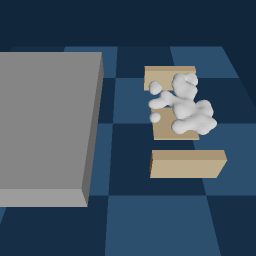

In [38]:
# Test a gripping and lifting motion
from plb.utils.visualization_utils import save_numpy_as_gif
import numpy as np
from IPython.display import Image
from tqdm import tqdm

filename = 'data/env_modeling/gather.gif'
img_size = 256
env.reset()
frames, actions = [], []
for i in range(25):
    action = np.array([0] * 7 + [0.] * 6)
    action[6] = ((i < 10) - 0.5) * 2
    actions.append(action)

for i in range(30):
    action = np.array([0] * 7 + [0.] * 6)
    action[5] = 0.5
    actions.append(action)

for i in range(30):
    action = np.array([0] * 7 + [0.] * 6)
    action[6] = ((i < 20) - 0.5) * 2
    actions.append(action)

for i in range(25):
    action = np.array([0] * 7 + [0.] * 6)
    action[5] = -0.5
    actions.append(action)

for i in range(20):
    action = np.array([0] * 7 + [0.] * 6)
    action[6] = ((i < 10) - 0.5) * 2
    actions.append(action)

for i in range(15):
    action = np.array([0] * 7 + [0.] * 6)
    action[7 + 1] = 1.
    actions.append(action)

for i in range(20):  # Rotation
    action = np.array([0] * 7 + [0.] * 6)
    action[-1] = 0.5
    action[7] = -1
    actions.append(action)

for i in range(15):
    action = np.array([0] * 7 + [0.] * 6)
    action[7] = 0.5
    actions.append(action)

for action in tqdm(actions):
    env.step(action)
    frames.append(env.taichi_env.render(mode='rgb', img_size=img_size)[:, :, :3])
save_numpy_as_gif(np.array(frames), filename)
Image(filename)

